## Loading the dependencies

In [1]:
from __future__ import absolute_import, division, print_function

In [2]:
import codecs, multiprocessing, os, pprint, re

In [3]:
import nltk
import gensim.models.word2vec as w2v
import sklearn.manifold
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

C:\Users\Gaurav Ahlawat\Anaconda3\lib\site-packages\gensim\utils.py:860: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


## Loading the data

In [4]:
with codecs.open('data_for_DL5.txt',"r","utf-8") as f:
    corpus_tweets = f.read()
print(len(corpus_tweets))

33851332


## Pre-processing the Data

In [5]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords

stopWords = set(stopwords.words("english"))

In [6]:
raw_sentences = sent_tokenize(corpus_tweets)

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from nltk.tokenize import TweetTokenizer
tokenizer = TweetTokenizer()

In [8]:
sentences = []

for sentence in raw_sentences:
    if len(sentence) > 0:
        tokens = tokenizer.tokenize(sentence)
        tokens_filtered = []
        for i in tokens:
            if i.startswith('@') or i.startswith('#') or i.startswith('http'):
                if i in stopWords:
                    continue
            else:
                tokens_filtered.append(i.lower())
        sentences.append(tokens_filtered)

In [9]:
token_count = sum([len(sentence) for sentence in sentences])
print(token_count)

5328785


## Creating a word2vec model in Gensim

In [10]:
num_features = 200
min_word_count = 10
num_workers = multiprocessing.cpu_count()
context_size = 3
downsampling = 1e-5
seed = 1

In [11]:
tweets2vec = w2v.Word2Vec(
    sg=1,
    seed=seed,
    workers=num_workers,
    size=num_features,
    min_count=min_word_count,
    window=context_size,
    sample=downsampling
)

In [12]:
tweets2vec.build_vocab(sentences)

In [13]:
len(tweets2vec.wv.vocab)

11112

In [14]:
tweets2vec.train(sentences, total_examples = token_count, epochs = 1)

1000738

In [15]:
if not os.path.exists("word2vec_trained"):
    os.makedirs("word2vec_trained")

In [16]:
tweets2vec.save(os.path.join("word_vec_trained", "tweets2vec.w2v"))

In [17]:
tweets2vec = w2v.Word2Vec.load(os.path.join("word_vec_trained", "tweets2vec.w2v"))

## Testing the similarity measure on the trained model to see if it works or not!

In [19]:
tweets2vec.similarity('united','liverpool')

0.79358710310563263

In [20]:
tweets2vec.similarity('united','arsenal')

0.91119735084478304

In [21]:
tweets2vec.similarity('united','chelsea')

0.95761372524857591

In [22]:
tweets2vec.similarity('alexis','kane')

0.95302891704989023

In [23]:
tweets2vec.similarity('alexis','pogba')

0.67953111429145108

In [24]:
tweets2vec.similarity('alexis','lovren')

0.99199955428925612

In [25]:
tweets2vec.similarity('lovren','coutinho')

0.7801484275871462

In [26]:
tweets2vec.similarity('coutinho','firmino')

0.79598696829978932

In [29]:
tweets2vec.similarity('coutinho','jurgen')

0.68688136481660444

In [30]:
tweets2vec.similarity('firmino','bellerin')

0.99122256089348304

In [31]:
tweets2vec.similarity('coutinho','chelsea')

0.4964182696281163

In [32]:
tweets2vec.similarity('united','liverpool')

0.79358710310563263

In [33]:
tweets2vec.similarity('spurs','chelsea')

0.84663799338139967

In [34]:
tweets2vec.similarity('united','spurs')

0.89072201754524771

In [35]:
tweets2vec.similarity('spurs','kane')

0.84552797955478087

In [36]:
tweets2vec.most_similar('liverpool')

[('via', 0.964800238609314),
 ('thi', 0.960404634475708),
 ('🤔', 0.9554797410964966),
 ('🏽', 0.9552463293075562),
 ('saying', 0.955226719379425),
 ('conversation', 0.9551106691360474),
 ('😈', 0.9548919200897217),
 ('outburst', 0.9548364877700806),
 ('asks', 0.954781174659729),
 ('guadiola', 0.9532008171081543)]

In [37]:
tweets2vec.most_similar('chelsea')

[('betfred', 0.9915265440940857),
 ('acca', 0.9900273084640503),
 ('huddersfield', 0.985569179058075),
 ('available', 0.9852497577667236),
 ('odds', 0.984959602355957),
 ('6/1', 0.9849052429199219),
 ('only', 0.983601987361908),
 ('markets', 0.9834248423576355),
 ('predictions', 0.9820533394813538),
 ('william', 0.9820196628570557)]

In [38]:
tweets2vec.most_similar('united')

[('channel', 0.9760332107543945),
 ('app', 0.9756187796592712),
 ('live', 0.9754747748374939),
 ('huddersfield', 0.9754595756530762),
 ('share', 0.9738609790802002),
 ('vs', 0.9728983640670776),
 ('online', 0.9719775915145874),
 ('highlights', 0.9711254835128784),
 ('officiated', 0.9700526595115662),
 ('streams', 0.970044732093811)]

In [39]:
tweets2vec.most_similar('spurs')

[('preparing', 0.9741594195365906),
 ('clash', 0.9669271111488342),
 ('iphone', 0.9642331600189209),
 ('football', 0.9636700749397278),
 ('latest', 0.963310718536377),
 ('remains', 0.9632129669189453),
 ('rumours', 0.9624553918838501),
 ('case', 0.9619837999343872),
 ('video', 0.9618695974349976),
 ('action', 0.960396409034729)]

In [40]:
tweets2vec.most_similar('arsenal')

[('ham', 0.9749374389648438),
 ('expens', 0.9714587926864624),
 ('man', 0.9693864583969116),
 ('tips', 0.9674860239028931),
 ('stun', 0.9651429653167725),
 ('28/1', 0.9648813009262085),
 ('12/1', 0.9641289710998535),
 ('bournemouth', 0.9636752605438232),
 ('utd', 0.9629031419754028),
 ('use', 0.9601637721061707)]

In [43]:
tweets2vec.most_similar('city')

[('current', 0.967821478843689),
 ('stun', 0.966748833656311),
 ('gave', 0.9659435749053955),
 ('▪', 0.9617830514907837),
 ('cata', 0.9609867930412292),
 ('finds', 0.9596508145332336),
 ('suspensions', 0.9593576192855835),
 ('daily', 0.9592171907424927),
 ('gossip', 0.9567898511886597),
 ('boris', 0.9553034901618958)]

In [44]:
tweets2vec.most_similar('guardiola')

[('breaking', 0.9887136220932007),
 ('redmond', 0.9847463369369507),
 ('explain', 0.9838262796401978),
 ('asked', 0.9825849533081055),
 ('nathan', 0.9825261831283569),
 ('incident', 0.9758927822113037),
 ('pep', 0.9748539924621582),
 ('requested', 0.9718921780586243),
 ('thinks', 0.9703424572944641),
 ('ask', 0.960599958896637)]

In [45]:
tweets2vec.most_similar('mourinho')

[('rarely', 0.9869464039802551),
 ('jose', 0.9735189080238342),
 ('kaka', 0.9729779958724976),
 ('women', 0.9724372625350952),
 ('mou', 0.9722972512245178),
 ('name', 0.9710775017738342),
 ('kompany', 0.9705560207366943),
 ('transfer', 0.9697768688201904),
 ('due', 0.9684529900550842),
 ('instead', 0.9678247570991516)]

In [46]:
tweets2vec.most_similar('kop')

[('emphatically', 0.9989320635795593),
 ('businesses', 0.9987776875495911),
 ('one-on-one', 0.9987714886665344),
 ('vacant', 0.9986920356750488),
 ('duke', 0.9986513257026672),
 ('sights', 0.9986189603805542),
 ('manveer', 0.9986134767532349),
 ('navy', 0.9985369443893433),
 ('vindu', 0.9985336065292358),
 ('long-term', 0.9985166788101196)]

In [47]:
tweets2vec.most_similar('anfield')

[('concerns', 0.9977989196777344),
 ('outstanding', 0.9968101382255554),
 ('obviously', 0.9960460662841797),
 ('hilarious', 0.9959403276443481),
 ('moves', 0.995850682258606),
 ('subject', 0.9958176016807556),
 ('usual', 0.9956345558166504),
 ('😄', 0.9953359961509705),
 ('👋', 0.9952561855316162),
 ('stock', 0.9951803088188171)]

In [48]:
tweets2vec.most_similar('football')

[('latest', 0.9959023594856262),
 ('view', 0.9933862686157227),
 ('read', 0.991013765335083),
 ('pressure', 0.9888580441474915),
 ('clash', 0.9879084825515747),
 ('sunderland', 0.9874869585037231),
 ('action', 0.9851706027984619),
 ('case', 0.9850869178771973),
 ('burnley', 0.9848434329032898),
 ('tv', 0.9846303462982178)]

In [50]:
tweets2vec.most_similar('degea')

[('poles', 0.9995653629302979),
 ('julian', 0.9995192885398865),
 ('fuss', 0.9994828701019287),
 ('richie', 0.9994592666625977),
 ('frnds', 0.9994189739227295),
 ('plummet', 0.9994033575057983),
 ('sentinel', 0.9994032382965088),
 ('advised', 0.999396562576294),
 ('nearby', 0.9993953704833984),
 ('prematch', 0.9993950128555298)]

In [51]:
tweets2vec.train(sentences, total_examples = token_count, epochs = 5)

5000915

In [52]:
tweets2vec = w2v.Word2Vec.load(os.path.join("trained2", "tweets2vec.w2v"))

In [53]:
tweets2vec.similarity('united', 'chelsea')

0.93291073010698011

In [54]:
tweets2vec.similarity('united','liverpool')

0.96958487649440395

In [102]:
tweets2vec.similarity('wenger','out')

0.84422457578795229

In [103]:
tweets2vec.similarity('pep','mourinho')

0.95616237714704733

In [104]:
tweets2vec.similarity('contract','liverpool')

0.99676441725871312

In [105]:
tweets2vec.similarity('can','contract')

0.87031926575951413

In [55]:
tweets2vec.most_similar('liverpool')

[('damage', 0.9993199110031128),
 ('jokes', 0.999285876750946),
 ('Sounds', 0.9992241263389587),
 ('competitive', 0.9991964101791382),
 ('Fpl', 0.9991742372512817),
 ('accuses', 0.9991578459739685),
 ('Considering', 0.9991480112075806),
 ('🔫', 0.999133288860321),
 ('free-kicks', 0.999129056930542),
 ('worrying', 0.9991268515586853)]

In [57]:
tweets2vec.most_similar('ozil')

[('Black', 0.9994012117385864),
 ('tf', 0.9992019534111023),
 ('Sit', 0.9991540908813477),
 ('list', 0.9991492033004761),
 ('WengerRT', 0.9990449547767639),
 ('RM', 0.9990291595458984),
 ('grab', 0.9990274906158447),
 ('stat', 0.9989809989929199),
 ('off.RT', 0.9989771246910095),
 ('provides', 0.9989701509475708)]

In [58]:
tweets2vec.most_similar('kane')

[('cant', 0.9938050508499146),
 ('crap', 0.9937206506729126),
 ('Hope', 0.9933936595916748),
 ('Again', 0.993076503276825),
 ('talks', 0.9930150508880615),
 ('CL', 0.9925451874732971),
 ('energy', 0.9923791885375977),
 ('Triple', 0.9923198223114014),
 ('lmaooooo', 0.99223792552948),
 ('clubs', 0.9918625354766846)]

In [59]:
tweets2vec.most_similar('offside')

[('hoping', 0.9976465106010437),
 ('putting', 0.9972785711288452),
 ('sing', 0.9970989227294922),
 ('ends', 0.9968646764755249),
 ('probably', 0.9966884255409241),
 ('break', 0.9965927600860596),
 ('old', 0.996543288230896),
 ('133', 0.996394157409668),
 ('got', 0.9961085319519043),
 ('frustrating', 0.9961017966270447)]

In [60]:
tweets2vec.most_similar('goal')

[('put', 0.9942833185195923),
 ('playmaker', 0.9937530159950256),
 ('hell', 0.9937053322792053),
 ('table', 0.9936402440071106),
 ('Where', 0.9928662180900574),
 ('convincing', 0.9925124049186707),
 ('chanting', 0.9922835826873779),
 ('puts', 0.9920358061790466),
 ('penalty', 0.9919613599777222),
 ('scores', 0.9915594458580017)]

In [61]:
tweets2vec.most_similar('flag')

[('Wilshere', 0.998294472694397),
 ('stays', 0.9954227209091187),
 ('saving', 0.9953417778015137),
 ('text', 0.9950311183929443),
 ('Alexis', 0.9946107268333435),
 ('drop', 0.9945216178894043),
 ('sweeps', 0.9932550191879272),
 ('Apparently', 0.9930428266525269),
 ('mates', 0.9929364323616028),
 ('display', 0.9928620457649231)]

In [62]:
tweets2vec.most_similar('out')

[('around', 0.997214138507843),
 ('it', 0.9967745542526245),
 ('matic', 0.9936771392822266),
 ('able', 0.9933567047119141),
 ('twice', 0.9929428100585938),
 ('terrible', 0.9929399490356445),
 ('is', 0.992787778377533),
 ('possibly', 0.9927641749382019),
 ('leave', 0.992679238319397),
 ('loves', 0.9921988248825073)]

In [63]:
tweets2vec.most_similar('pogba')

[('willing', 0.9991791248321533),
 ('cold', 0.999136209487915),
 ('fairness', 0.999070405960083),
 ('wild', 0.9990619421005249),
 ('nuts', 0.9990500211715698),
 ('ladies', 0.9990451335906982),
 ('meanwhile', 0.9989992380142212),
 ('built', 0.9989836812019348),
 ('atrocious', 0.9989781379699707),
 ('placed', 0.9989762902259827)]

In [88]:
tweets2vec.most_similar('contract')

[('ticket', 0.9985190629959106),
 ('bc', 0.9981884956359863),
 ('rated', 0.9981454610824585),
 ('Spain', 0.9980431795120239),
 ('midday', 0.9980388283729553),
 ('experience', 0.997957706451416),
 ('facing', 0.9979565739631653),
 ('sung', 0.9978780150413513),
 ('nick', 0.9978346824645996),
 ('Illustrated', 0.997816801071167)]

In [106]:
tweets2vec.most_similar('sterling')

[('Claridge', 0.9982285499572754),
 ('pointed', 0.9973375201225281),
 ('celebration', 0.9972175359725952),
 ('blues', 0.997072160243988),
 ('eating', 0.996934175491333),
 ('aerial', 0.996756374835968),
 ('hat', 0.9966816902160645),
 ('tweeted', 0.9966489672660828),
 ('relevant', 0.9966096878051758),
 ('Baba', 0.9963972568511963)]

In [92]:
tweets2vec.most_similar('alli')

[('trippier', 0.9985768795013428),
 ('Lloris', 0.998077929019928),
 ('betul', 0.9976844191551208),
 ('shops', 0.9971704483032227),
 ('Ward', 0.9971606731414795),
 ('doel', 0.9971333742141724),
 ('Facts', 0.9970473051071167),
 ('med', 0.9968563318252563),
 ('aku', 0.9968293309211731),
 ('GIF', 0.9968165159225464)]

In [101]:
tweets2vec.most_similar('refree')

[('assistant', 0.9995337128639221),
 ('diganti', 0.9995148181915283),
 ('ck', 0.9994994401931763),
 ('State', 0.9994860291481018),
 ('scouting', 0.9994657039642334),
 ('🚬', 0.9994652271270752),
 ('bank', 0.9994637966156006),
 ('Bill', 0.99946129322052),
 ('extended', 0.999458372592926),
 ('Target', 0.9994329214096069)]

## Dimensionality Reduction using T-SNE

In [64]:
tsne = sklearn.manifold.TSNE(n_components=2, random_state=0)

In [65]:
all_word_vectors_matrix = tweets2vec.wv.syn0

In [66]:
print(all_word_vectors_matrix)

[[  9.91262943e-02   1.12987002e-02   1.45851597e-01 ...,  -3.49968486e-02
    1.00093089e-01  -3.80540229e-02]
 [  1.00672571e-02  -2.33957786e-02   1.54127270e-01 ...,  -3.72041459e-03
    1.06087841e-01  -7.29869399e-03]
 [  1.20315008e-01   3.86862792e-02   2.05270752e-01 ...,   4.28553335e-02
    1.48960263e-01   8.32737312e-02]
 ..., 
 [  1.13146994e-02  -3.68985496e-02   1.35911837e-01 ...,   2.64309067e-02
    1.94163591e-01  -4.44570780e-02]
 [  3.54213081e-03  -2.00787485e-02   7.18105808e-02 ...,   1.86383724e-04
    8.12060609e-02  -9.53558646e-03]
 [  2.68437453e-02  -1.26131894e-02   1.19196944e-01 ...,   8.13006330e-03
    1.11392342e-01  -3.97149567e-03]]


In [67]:
all_word_vectors_matrix_2d = tsne.fit_transform(all_word_vectors_matrix)

In [68]:
len(all_word_vectors_matrix_2d)

15622

In [69]:
points = pd.DataFrame(
    [
        (word, coords[0], coords[1])
        for word, coords in [
            (word, all_word_vectors_matrix_2d[tweets2vec.wv.vocab[word].index])
            for word in tweets2vec.wv.vocab
        ]
    ],
    columns=["word", "x", "y"]
)

In [70]:
sns.set_context("poster")

In [71]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\Gaurav Ahlawat\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['seed', 'f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## Plotting the whole graph, but too much noise

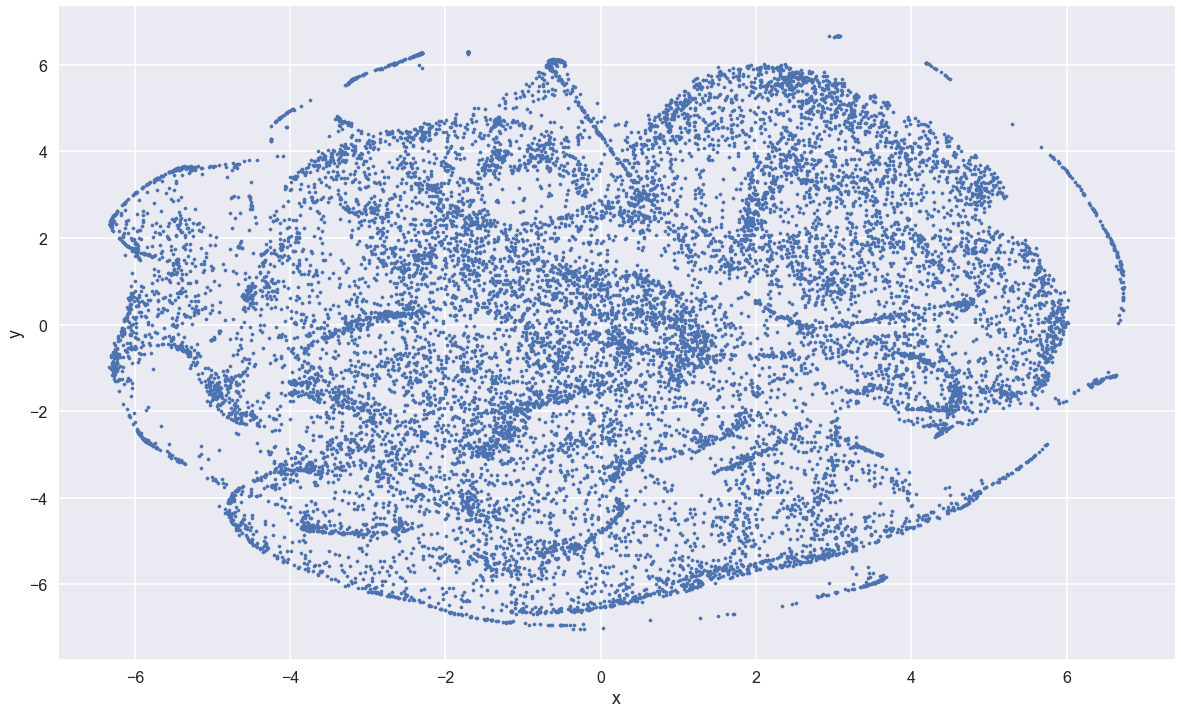

In [72]:
points.plot.scatter("x", "y", s=10, figsize=(20, 12))

In [73]:
def plot_region(x_bounds, y_bounds):
    slice = points[
        (x_bounds[0] <= points.x) &
        (points.x <= x_bounds[1]) & 
        (y_bounds[0] <= points.y) &
        (points.y <= y_bounds[1])
    ]
    
    ax = slice.plot.scatter("x", "y", s=35, figsize=(10, 8))
    for i, point in slice.iterrows():
        ax.text(point.x + 0.005, point.y + 0.005, point.word, fontsize=11)

## Focussing on smaller regions to get a better view of things

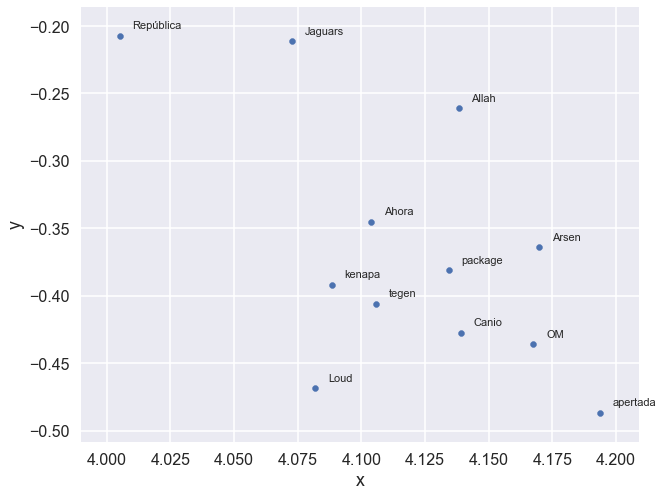

In [74]:
plot_region(x_bounds=(4.0, 4.2), y_bounds=(-0.5, -0.1))

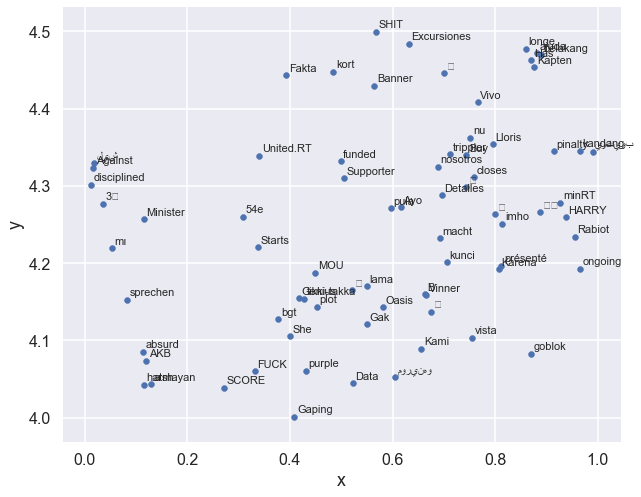

In [75]:
plot_region(x_bounds=(0, 1), y_bounds=(4, 4.5))

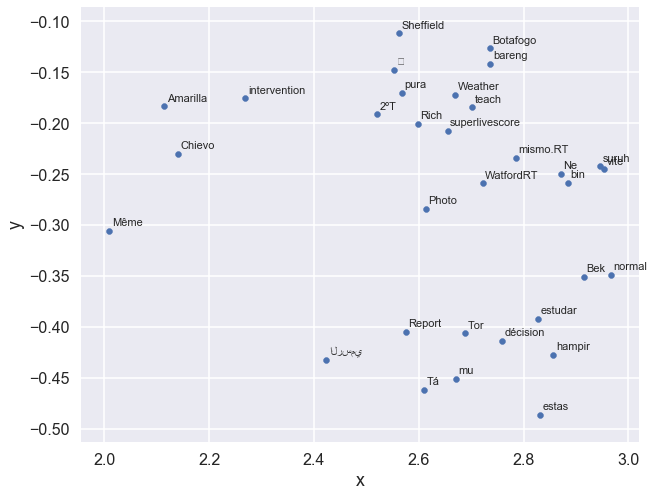

In [76]:
plot_region(x_bounds=(2.0, 3.0), y_bounds=(-0.5, -0.1))

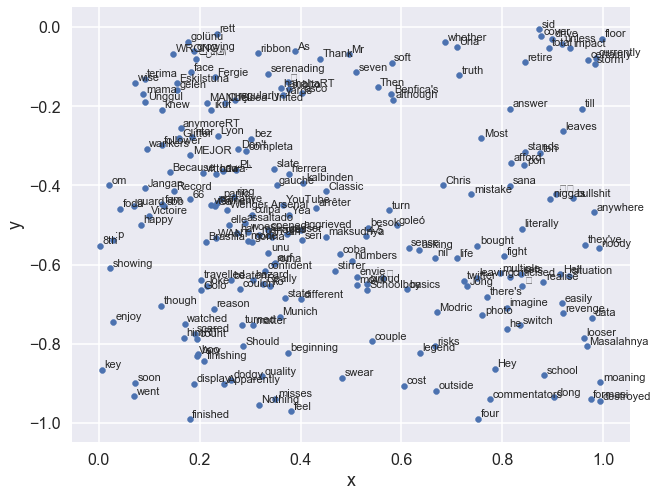

In [78]:
plot_region(x_bounds=(0.0, 1.0), y_bounds=(-1.0, 0.0))

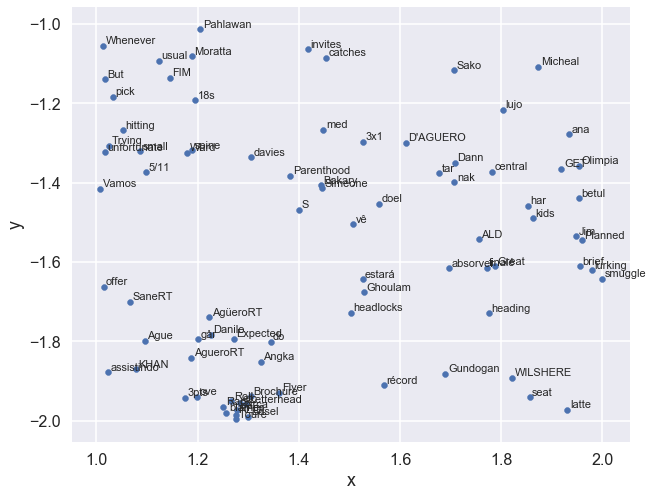

In [79]:
plot_region(x_bounds=(1.0, 2.0), y_bounds=(-2.0, -1.0))

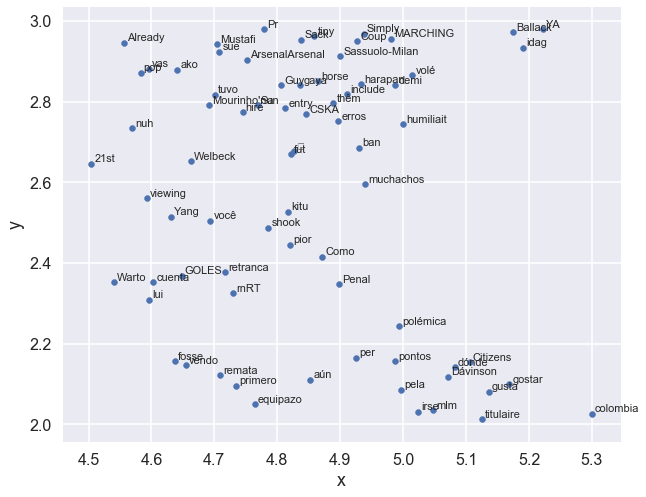

In [84]:
plot_region(x_bounds=(4.5, 5.5), y_bounds=(2.0, 3.0))

## Plotting an interactive version of the Points graph using Bokeh library

In [86]:
import bokeh.plotting as bp
from bokeh.models import HoverTool, BoxSelectTool
from bokeh.plotting import figure, show, output_notebook

# defining the chart
output_notebook()
plot_tfidf = bp.figure(plot_width=700, plot_height=600, title="A map of 1000 word vectors",
    tools="pan,wheel_zoom,box_zoom,reset,hover,previewsave",
    x_axis_type=None, y_axis_type=None, min_border=1)

points['words'] = tweets2vec.wv.vocab.keys()

# plotting. the corresponding word appears when you hover on the data point.
plot_tfidf.scatter(x='x', y='y', source=points)
hover = plot_tfidf.select(dict(type=HoverTool))
hover.tooltips={"word": "@words"}
show(plot_tfidf)

Loading BokehJS ...